In [203]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # For creating 3-D graphs

### Generate random input data to train the model

In [204]:
observations = 10000 # n = number of observations

# We define the input variables k
x = np.random.uniform(-10,10,(observations,1))
z = np.random.uniform(-10,10,(observations,1))

In [205]:
# We then convert the input variables into a matrix. Based on the equation n x m = n x k . k x m + 1 x m
# The column stack allows us to convert both variables into a 1000 * 2 matrix

inputs = np.column_stack((x,z))
inputs.shape

(10000, 2)

#### Define the targets

In [206]:
# In this exercise, our weights are 2 and -3. We then create our target whcich is 
# f(x,z) = 2x - 3z + 5 + noise
# We use noise because our data usually contains some noise so we simulate that here

noise = np.random.uniform(-1,1,(observations,1))
targets = 13*x + 7*z - 12 + noise

targets.shape

(10000, 1)

#### Create a 3-D plot

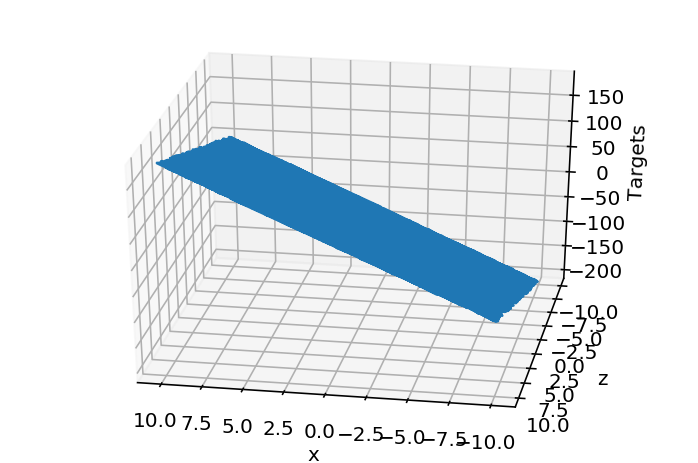

In [207]:
# We reshape the targets to create our 3D-plot
targets = targets.reshape(observations,)

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d') # The 111 represents the position of the x and y axes and the index
# It could also be represented as fig.add_subplot(1,1,1)
ax.plot(x,z,targets)

ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('Targets')

ax.view_init(azim = 100) # We use the elevation and azimuth to change the elevation and azimuth angles of the plane
plt.show()
targets = targets.reshape(observations,1)

#### Define the weights and biases

In [208]:
# We use -0.1 and 0.1 as the range for the initial weight and bias
init = 0.1

# Following the shape of the input variables(1000 x 2) and the two weights we have, to make n x m output we make 
# the shape of the weights a 2 x 1 matrix
weights = np.random.uniform(-init,init,(2, 1))

# Also, since the bias follows the number of outputs(m) which is 1 in this case, we make the bias a scalar
biases = np.random.uniform(-init,init,1)
print(weights)
print(biases)

[[-0.03075064]
 [-0.09481583]]
[-0.06933864]


#### Set the Learning rate

In [209]:
eta = 0.02

#### Train the Model

In [216]:
for i in range(150):
    
    outputs = np.dot(inputs,weights) + biases # The equation y = xw + b

    delta = outputs - targets # We define our delta to be used in the L2-norm loss

    # We divide the L2-norm loss by 2 and by the number of observations in order
    # to arrive at the same result irrespective of the number of observations rather than change the learning rate. 
    loss = np.sum(delta**2)/2/observations 
    print(loss)
    
    delta_scaled = delta/observations
    
    # We then use the update rule for the weights and biases
    
    weights = weights - eta * np.dot(inputs.T, delta_scaled) # We transpose the inputs matrix to make the matrix
    # multiplication possible as transposing a matrix does not affect the information they hold
    # The dot product calculates the sum for us
    
    # We do the same for the biases
    biases = biases - eta * np.sum(delta_scaled)

0.16919878614327324
0.16918331728346014
0.1691684608599258
0.16915419262536333
0.16914048929245404
0.16912732849586076
0.16911468875572477
0.1691025494426085
0.16909089074382624
0.16907969363110664
0.1690689398295382
0.16905861178774106
0.169048692649222
0.16903916622486287
0.16903001696649747
0.16902122994153634
0.16901279080859405
0.16900468579408312
0.1689969016697339
0.16898942573100456
0.1689822457763461
0.16897535008728748
0.1689687274093103
0.16896236693348024
0.16895625827880562
0.16895039147529387
0.168944756947681
0.1689393454998013
0.16893414829958084
0.16892915686462048
0.16892436304835276
0.1689197590267455
0.16891533728553224
0.1689110906079481
0.16890701206295086
0.16890309499390915
0.16889933300773827
0.1688957199644657
0.16889224996720956
0.16888891735255523
0.1688857166813114
0.16888264272963238
0.1688796904804933
0.16887685511550077
0.1688741320070292
0.16887151671066766
0.16886900495796706
0.1688665926494721
0.16886427584803154
0.1688620507723726
0.1688599137909282


#### Extract the values of the weights and biases at the minimised loss function

In [217]:
print(weights,biases)

[[13.00020243]
 [ 6.99945797]] [-12.00196429]


In [218]:
# Comparing the weights and biases of the output to that of the target, we can see that the loss function is reduced
# over a number of iterations. Running the iteration further reduces the L2-norm loss and brings us closer to the 
# target

#### Plot the last outputs vs the targets
Since they are the last outputs after optimization, they represent the accuracy of
the model. We then plot the outputs against the targets. The closer this plot is to
a 45-degree line, the closer the output and target values are

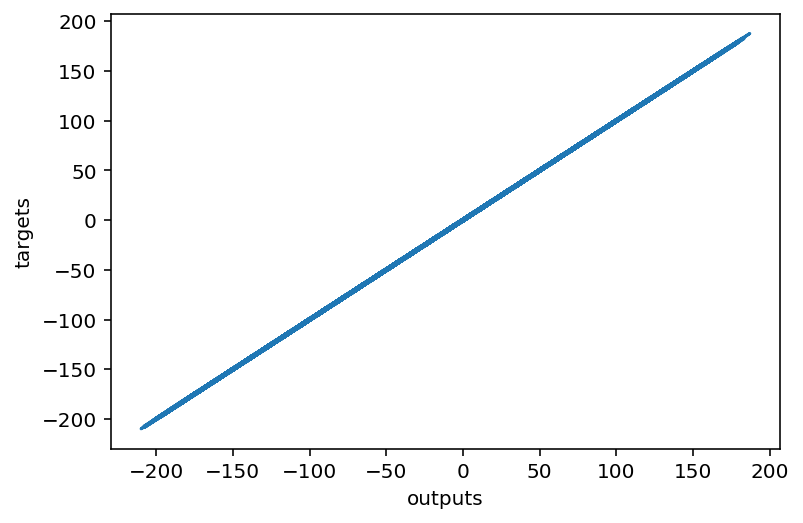

In [219]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()